# SIMULAÇÃO HAMILTONIANA

Aqui vamos tentar aplicar um método de **simulação hamiltoniana ATS**, apresentada por Aharonov and Ta-Shma.
Nessa formulação, o hamiltoniano é dada como uma matriz esparsa. 
* **Método de Lloyd**

Primeiramente, consideramos o **método do Lloyd**. Um sistema quântico é composto por $N$ subsistemas e representamos o Hamiltoniano total como uma soma destes subsistemas:
$$
H = \sum^{m}_{j=1}H_j
$$
Cada termo $H_j$ age em um subsistema com dimensão de, no máximo, $d_j$. Com isso, o número de operações requeridas para a simulação hamiltoniano sobre $H_j$ escala em $d_j^2$. Uma aproximação usada por Lloyd é:

$$
e^{iHt} \approx (e^{iH_1t/r}\dots e^{iHmt/r})^r
$$
Como o numero de operações requeridos para simular cada Hamiltoniano $H_j$ escala em $d_j^2$, o número total de passos é $r\sum^{m}_{j=1}d_j^2 \leq 
    rmd^2$, o qual $d$ é $\max{d_j}$.

* **Método ATS**

No método ATS é considerada a simulação de um hamiltoniano arbitrário representado por uma matrix esparsa, isto é, com apenas um moderado número de elementos não-zerados. Podemos afirmar que os Hamiltonianos considerados por Lloyd podem ser representados por matrizes esparsas pois, como cada Hamiltoniano $H_j$ age em apenas $d_j$ dimensões, então a sua matriz representante não terá mais que $d_j$ elementos em cada linha. Dessa maneira, o Hamiltoniano completo não terá mais que $md$ elementos em cada linha. Como o número de elementos cresce polinomialmente com a quantidade de subsistemas e a matriz cresce exponencialmente, podemos afirmar que a matriz completa é esparsa.

A grande diferença entre o problema considerado por Lloyd e pelo ATS é que, no problema do LLoyd, a decomposição do Hamiltoniano já é dada, enquanto no ATS, apenas assume-se que há um método de calcular os termos não-zeros das colunas do Hamiltoniano.

No caso do Hamiltoniano H tiver, no máximo $D$ elementos não zeros em cada linha e agir em um sistema de até $2^n$ dimensões ($n$ qubits), ATS mostra um método de decompor H em uma soma de até $(D+1)^2n^6$ termos. Temos então:
$$
H = \sum^{(D+1)^2n^6}_{j=1}H_j
$$

Cada $H_j$ é 1-esparsa, o que implica que cada $H_j$ é equivalente a uma matriz diagonal $2\times2$.

1) Decomposição do Hamiltoniano

Para implementar a decomposição do hamiltoniano, o método é equivalente ao problema de coloração de um grafo não-direcionado. Os nós dos grafos correspondem aos estados base e as arestas correspondem aos elementos não-zeros do hamiltoniano. O problema é colorir o grafo de tal maneira que não haja 2 arestas com a mesma cor conectado ao mesmo grafo. No método ATS, a cor pode ser representada por um vetor:

$$
\begin{split}
\vec{j} = (\nu,x\mod{\nu}, y\mod{\nu}, \text{rind}_H(x,y), \text{cind}_H(x,y))
\end{split}
$$
por convenção $x\leq y$.

$\nu$ é escolhido de maneira que:
$$
\begin{split}
\nu = 1 \text{ if } x = y \\
\nu = \text{first $int$ in range } [2\dots n^2] \text{ s.t. } x \neq \mod{\nu}
\end{split}
$$

Para conveniência, definimos uma função $f$ que retorna os elementos não-zeros de cada coluna. Se os elementos não-zeros na coluna $x$ são $y_1, \dots, y_D'$, o qual $D' \leq D$, então: 
$$
\begin{split}
f(x,i) = (y_i, H_{x,y_i}) \text{ for } i \leq D'\\
f(x,i) = (x,0) \text{ for } i \geq D'
\end{split}
$$

As definições de cind$_H$ e rind$_H$ são feita a partir de $f$. Se $H_{x,y} \neq 0$, então:
$$
\begin{split}
f_y(y, \text{cind}_H(x,y)) = x\\
f_y(x, \text{rind}_H(x,y)) = y
\end{split}
$$

Isto é, cind$_H$ retorna o índice da coluna de $x$ e rind$_H$ o índice da linha $y$.

Importing libraries

In [15]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from faker import Faker
fake = Faker()

Definindo a matriz hermitiana.

In [16]:
A = np.matrix([[0, 0, 0, 0, 2, 0, 0, 0],
               [0, 0, 0, 0, 8, 5, 0, 6], 
               [0, 0, 0, 0, 0, 0, 7, 0], 
               [0, 0, 0, 0, 0, 5, 3, 4],
               [2, 8, 0, 0, 0, 0, 0, 0],
               [0, 5, 0, 5, 0, 0, 0, 0],
               [0, 0, 7, 3, 0, 0, 0, 0],
               [0, 6, 0, 4, 0, 0, 0, 0],
              ])
A

matrix([[0, 0, 0, 0, 2, 0, 0, 0],
        [0, 0, 0, 0, 8, 5, 0, 6],
        [0, 0, 0, 0, 0, 0, 7, 0],
        [0, 0, 0, 0, 0, 5, 3, 4],
        [2, 8, 0, 0, 0, 0, 0, 0],
        [0, 5, 0, 5, 0, 0, 0, 0],
        [0, 0, 7, 3, 0, 0, 0, 0],
        [0, 6, 0, 4, 0, 0, 0, 0]])

Toda matriz hermitiana pode ser representada como um grafo regular.

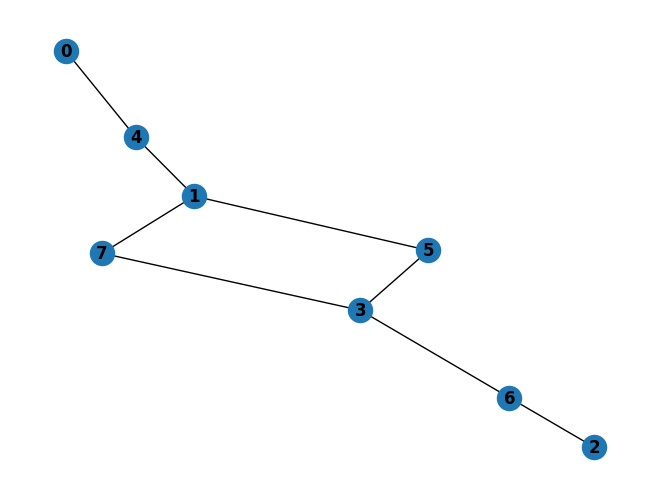

In [17]:
# Drawing the graphs
G = nx.from_numpy_array(A)
nx.draw(G, with_labels=True, font_weight='bold')

In [18]:
# Converting a adjadence matrix graph to a list graph  
def matrix_to_list(A):
    colors = {}
    for i in range(len(A)):
        colors[str(i)] = []
        for j in range(len(A)):
            if A[int(i),j] != 0:
                colors[str(i)].append(j)
    return colors
A_list = matrix_to_list(A)
A_list

{'0': [4],
 '1': [4, 5, 7],
 '2': [6],
 '3': [5, 6, 7],
 '4': [0, 1],
 '5': [1, 3],
 '6': [2, 3],
 '7': [1, 3]}

Vamos implementar a coloração de arestas de cordo com o método mencionado acima.

$$
\begin{split}
\vec{j} = (\nu,x\mod{\nu}, y\mod{\nu}, \text{rind}_H(x,y), \text{cind}_H(x,y))
\end{split}
$$

Primeiro identificamos um $$\nu$$ o qual será igual a 1, se $i=j$, e igual ao primeiro inteiro de $[2\dots n^2]$ tal que $x \not\equiv y \mod \nu$.

In [95]:
def rind(i, j):
    iter = 0
    if not A[i,j]:
        return 0
    else:
        for k in range(len(A)):
            if A[k,j] and k<=i:
                iter+=1
        return iter


def cind(i, j):
    iter = 0
    if not A[i,j]:
        return 0
    else:
        for k in range(len(A)):
            if A[i,k] and k<=j:
                iter+=1
        return iter


def mod_incongruence(x,y,div):
    if x % div != y:
        return True
    else:
        return False
    
def assign_color(G):
    color = {}
    n = np.int8(np.log2(G.number_of_nodes()))
    print(n)

    for e in G.edges:
        for div in range(2, n**2):
            if(e[0] == e[1]):
                color[e] = (1, e[0], e[1], 0, 0)                
                print(color[e])
                break
            else:
                print(e)
                print(mod_incongruence(e[0], e[1], div))
                if mod_incongruence(e[0], e[1], div):
                    color[e] = (div, e[0], e[1], rind(e[0], e[1]), cind(e[0], e[1]))
                    break
    
    return color

coloracao = assign_color(G)
print("\n\nA coloração feita é ")
coloracao

3
(0, 4)
True
(1, 4)
True
(1, 5)
True
(1, 7)
True
(2, 6)
True
(3, 5)
True
(3, 6)
True
(3, 7)
True


A coloração feita é 


{(0, 4): (2, 0, 4, 1, 1),
 (1, 4): (2, 1, 4, 2, 1),
 (1, 5): (2, 1, 5, 1, 2),
 (1, 7): (2, 1, 7, 1, 3),
 (2, 6): (2, 2, 6, 1, 1),
 (3, 5): (2, 3, 5, 2, 1),
 (3, 6): (2, 3, 6, 2, 2),
 (3, 7): (2, 3, 7, 2, 3)}

In [151]:
# Criar matrizes 1x1 e 2x2 conforme ATS
def build_matrices(coloracao):
    matrices1 = []   # Matrices 1x1
    matrices2 = []   # Matrices 2x2
    for key in coloracao:
        if key[0] == key[1]:
            matrices1 = [[A[key[0],key[1]]]]
            matrices1.append(new_matrix)
        else:
            new_matrix = [[ A[key[0], coloracao[key][2] % coloracao[key][0]], A[key[0], key[1]]], [A[key[1], key[0]], A[len(A) - key[1], key[1]]]]
            matrices2.append(new_matrix)
            
            print(new_matrix)
            print("==================================================================================")
    return matrices1, matrices2
matrices1, matrices2 = checa_iguais(coloracao)
matrices1

[[0, 2], [2, 0]]
[[0, 8], [8, 0]]
[[0, 5], [5, 5]]
[[0, 6], [6, 6]]
[[0, 7], [7, 7]]
[[0, 5], [5, 5]]
[[0, 3], [3, 7]]
[[0, 4], [4, 6]]


[]

In [152]:
matrices2 # Imprime as matrizes 2x2

[[[0, 2], [2, 0]],
 [[0, 8], [8, 0]],
 [[0, 5], [5, 5]],
 [[0, 6], [6, 6]],
 [[0, 7], [7, 7]],
 [[0, 5], [5, 5]],
 [[0, 3], [3, 7]],
 [[0, 4], [4, 6]]]